## HW3: Decision Tree, Random Forest, and Adaboost
In hw3, you need to implement decision tree, random forest and adaboost by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.tree.DecisionTreeClassifier

## Install Package and Import

Install the packages which will be used, and import them.

In [1]:
!pip install numpy
!pip install sklearn
!pip install pandas

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from collections import Counter
import math

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

## Load data

In [3]:
data = load_breast_cancer()
feature_names = data['feature_names']
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

y_train = y_train.values[:, 0]
y_test = y_test.values[:, 0]

In [5]:
x_train.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969
1,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.16320,0.16220,0.07393,0.2781,0.08052
2,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.38410,0.57540,0.18720,0.3258,0.09720
3,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,...,22.32,25.73,148.20,1538.0,0.1021,0.22640,0.32070,0.12180,0.2841,0.06541
4,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.35080,0.19390,0.2928,0.07867
5,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.24,27.84,158.30,1656.0,0.1178,0.29200,0.38610,0.19200,0.2909,0.05865
6,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,...,10.62,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151
7,15.270,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,...,17.38,15.92,113.70,932.7,0.1222,0.21860,0.29620,0.10350,0.2320,0.07474
8,13.870,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.1153,0.10080,0.05285,0.05556,0.2362,0.07113
9,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.15210,0.10990,0.2572,0.07097


## Question 1

Gini Index or Entropy is often used for measuring the “best” splitting of the data. Please compute the Entropy and Gini Index of provided data. Please use the formula from the course slides on E3

In this case, there are only two labels, but the following code enable data which has more than two labels.

In [6]:
def gini(sequence):
    
    c = Counter(sequence) # count the occurence of the labels
        
    gini = 1
    for ci in c.values():
        gini -= (ci / sum(c.values())) ** 2

    return gini

def entropy(sequence):
    
    c = Counter(sequence) # count the occurence of the labels
        
    entropy = 0
    for ci in c.values():
        if not ci == 0:
            entropy -= (ci / sum(c.values())) * math.log(ci / sum(c.values()), 2)
    return entropy

In [7]:
# 1 = class 1
# 2 = class 2
data = np.array([1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2])

In [8]:
print(f'Gini of the data is {gini(data)}')

Gini of the data is 0.4628099173553719


In [9]:
print(f'Entropy of the data is {entropy(data)}')

Entropy of the data is 0.9456603046006402


## Question 2
Implement the Decision Tree algorithm (CART, Classification and Regression Trees) and trained the model by the given arguments, and print the accuracy score on the test data. You should implement two arguments for the Decision Tree algorithm
1. **Criterion**: The function to measure the quality of a split. Your model should support “gini” for the Gini impurity and “entropy” for the information gain. 
2. **Max_depth**: The maximum depth of the tree. If Max_depth=None, then nodes are expanded until all leaves are pure. Max_depth=1 equals to split data once


### Tree Node Class

A class of tree node will be defined in the following.

A decision tree will be built by tree nodes.

In [10]:
class Node():
    def __init__(self, data, labels, depth):
        self.data = data
        self.labels = labels
        self.depth = depth  # node depth
        self.impurity = math.inf
        self.feature = None
        self.threshold = None
        self.left = None # left child node
        self.right = None # right child node
        return None
    
    # set multiple attributes
    def set_attributes(self, feature, threshold, left, right):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        return None

### Decision Tree Class

A class of decision tree will be defined in the following.

In [11]:
class DecisionTree():
    def __init__(self, criterion='gini', max_depth=None):
        if criterion == 'gini':
            self.criterion = gini
        else:
            self.criterion = entropy
        self.root = None  # the root of the tree
        self.max_depth = max_depth
        self.num_feats = None  # number of features in training data
        return None
    
    def fit(self, X, y):
        self.root = Node(np.array(X), np.array(y), 0)
        self.num_feats = np.array(X).shape[1]
        self.partition(self.root)  # split the tree by features and threshold in the root node
        return None
    
    def score(self, X, y):
        y_pred = self.predict(np.array(X))
        return accuracy_score(y_pred, np.array(y))
    
    def predict(self, X):
        y_pred = []
        for x in np.array(X):
            node = self.root
            # when the left child and right child is None, it reach the leaf
            while not node.left == None and not node.right == None:
                if x[node.feature] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            # choose the most common label in the node
            y_pred.append(np.argmax(np.bincount(node.labels)))
        return np.array(y_pred)
    
    def partition(self, node):
        # when the node reach the maximum depth, or all the labels in the node are the same then stop splitting
        if (self.max_depth != None and node.depth == self.max_depth) or len(np.unique(node.labels)) == 1:
            return None
        
        # search features
        for feat in range(self.num_feats):
            # search threshold
            for t in ((np.insert(np.sort(node.data[:, feat]), 0, 0) + np.insert(np.sort(node.data[:, feat]), len(node.data[:, feat]), np.sort(node.data[:, feat])[-1])) / 2)[1:-1]:
                # partition data
                left_part = node.data[node.data[:, feat] < t]
                left_labels = node.labels[node.data[:, feat] < t]
                right_part = node.data[node.data[:, feat] >= t]
                right_labels = node.labels[node.data[:, feat] >= t]
                # determine whether the partition is better
                tmp_impurity = (len(left_labels) / (len(left_labels) + len(right_labels))) * self.criterion(left_labels) + (len(right_labels) / (len(left_labels) + len(right_labels))) * self.criterion(right_labels)
                if tmp_impurity < node.impurity:
                    node.impurity = tmp_impurity
                    left_tree = Node(np.array(left_part), np.array(left_labels), node.depth + 1)
                    right_tree = Node(np.array(right_part), np.array(right_labels), node.depth + 1)
                    node.set_attributes(feat, t, left_tree, right_tree)
        # after partition, if the data is still not pure, partition its children
        if node.impurity != 0:
            self.partition(node.left)
            self.partition(node.right)
        return None

### Question 2.1
Using Criterion=‘gini’, showing the accuracy score of test data by Max_depth=3 and Max_depth=10, respectively.


In [12]:
clf_depth3 = DecisionTree(criterion='gini', max_depth=3)

clf_depth3.fit(x_train, y_train)

In [13]:
print(f'The accuracy of the testing data using the decision tree which its maximum depth is 3 is {clf_depth3.score(x_test, y_test)}')

The accuracy of the testing data using the decision tree which its maximum depth is 3 is 0.9230769230769231


In [14]:
clf_depth10 = DecisionTree(criterion='gini', max_depth=10)

clf_depth10.fit(x_train, y_train)

In [15]:
print(f'The accuracy of the testing data using the decision tree which its maximum depth is 10 is {clf_depth10.score(x_test, y_test)}')

The accuracy of the testing data using the decision tree which its maximum depth is 10 is 0.916083916083916


### Question 2.2
Using Max_depth=3, showing the accuracy score of test data by Criterion=‘gini’ and Criterion=’entropy’, respectively.


In [16]:
clf_gini = DecisionTree(criterion='gini', max_depth=3)

clf_gini.fit(x_train, y_train)

In [17]:
print(f'The accuracy of the testing data using the decision tree which its criterion is gini is {clf_gini.score(x_test, y_test)}')

The accuracy of the testing data using the decision tree which its criterion is gini is 0.9230769230769231


In [18]:
clf_entropy = DecisionTree(criterion='entropy', max_depth=3)

clf_entropy.fit(x_train, y_train)

In [19]:
print(f'The accuracy of the testing data using the decision tree which its criterion is entropy is {clf_entropy.score(x_test, y_test)}')

The accuracy of the testing data using the decision tree which its criterion is entropy is 0.9370629370629371


## Question 3
Plot the [feature importance](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/) of your Decision Tree model. You can get the feature importance by counting the feature used for splitting data.

- You can simply plot the feature counts for building tree without normalize the importance

![image](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/04/c45-fi-results.jpg?w=481&ssl=1)

In [20]:
feat_dict = dict(enumerate(feature_names))

feats = []

def get_feats(node):
    # when the node's left child and right child are both null, it is the leaf node
    if node.left == None and node.right == None:
        return None
    feats.append(node.feature)
    get_feats(node.left)
    get_feats(node.right)
    return None

get_feats(clf_depth10.root)

feats_counter = Counter(sorted(feats))

In [21]:
width = []
y_labels = []

for (key, value) in feats_counter.most_common()[-1::-1]:
    y_labels.append(feat_dict[key])
    width.append(value)

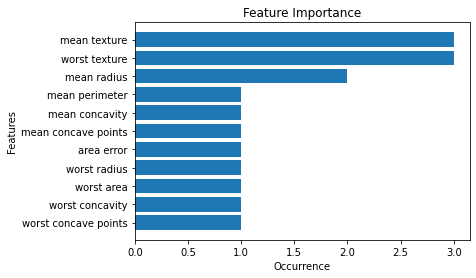

In [22]:
import matplotlib.pyplot as plt

y = np.arange(len(width))
plt.barh(y, width)
plt.yticks(y, y_labels)
plt.ylabel('Features')
plt.xlabel('Occurrence')
plt.title('Feature Importance')
plt.show()

## Question 4

Implement the Random Forest algorithm by using the CART you just implemented from question 2. You should implement three arguments for the Random Forest.

1. **N_estimators**: The number of trees in the forest. 
2. **Max_features**: The number of random select features to consider when looking for the best split
3. **Bootstrap**: Whether bootstrap samples are used when building tree


In [23]:
class RandomForest():
    def __init__(self, n_estimators, max_features, bootstrap=True, criterion='gini', max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = int(max_features)
        self.bootstrap = bootstrap
        self.criterion = criterion
        self.max_depth = max_depth
        self.clfs = []  # store the estimators
        self.feats_used = []  # store features which are used
        return None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        # train numbers of estimators
        for _ in range(self.n_estimators):
            # random select data with replacement
            rand_data_idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            # random select features with replacement
            rand_feat_idx = np.random.choice(X.shape[1], size=self.max_features, replace=False)
            self.feats_used.append(rand_feat_idx)
            rand_data = X[rand_data_idx, :][:, rand_feat_idx]
            rand_label = y[rand_data_idx]
            clf = DecisionTree(criterion=self.criterion, max_depth=self.max_depth)
            clf.fit(rand_data, rand_label)
            self.clfs.append(clf)
        return None
    
    def predict(self, X):
        # get predictions of each classifier
        votes = []
        for (clf, feats) in zip(self.clfs, self.feats_used):
            votes.append(clf.predict(np.array(X)[:, feats]))
        votes = np.array(votes)
        # vote the predictions of each classifier
        preds = []
        for j in range(votes.shape[1]):
            counts = np.bincount(votes[:, j])
            preds.append(np.argmax(counts))
        return np.array(preds)
    
    def score(self, X, y):
        y_pred = self.predict(np.array(X))
        return accuracy_score(y_pred, np.array(y))

### Question 4.1
Using Criterion=‘gini’, Max_depth=None, Max_features=sqrt(n_features), showing the accuracy score of test data by n_estimators=10 and n_estimators=100, respectively.


In [24]:
clf_10tree = RandomForest(n_estimators=10, max_features=np.sqrt(x_train.shape[1]))

clf_10tree.fit(x_train, y_train)

In [25]:
print(f'The accuracy of the testing data using random forest with 10 estimators is {clf_10tree.score(x_test, y_test)}')

The accuracy of the testing data using random forest with 10 estimators is 0.9370629370629371


In [26]:
clf_100tree = RandomForest(n_estimators=100, max_features=np.sqrt(x_train.shape[1]))

clf_100tree.fit(x_train, y_train)

In [27]:
print(f'The accuracy of the testing data using random forest with 100 estimators is {clf_100tree.score(x_test, y_test)}')

The accuracy of the testing data using random forest with 100 estimators is 0.958041958041958


### Question 4.2
Using Criterion=‘gini’, Max_depth=None, N_estimators=10, showing the accuracy score of test data by Max_features=sqrt(n_features) and Max_features=n_features, respectively.


In [28]:
clf_random_features = RandomForest(n_estimators=10, max_features=np.sqrt(x_train.shape[1]))

clf_random_features.fit(x_train, y_train)

In [29]:
print(f'The accuracy of the testing data using random forest with only a few features is {clf_random_features.score(x_test, y_test)}')

The accuracy of the testing data using random forest with only a few features is 0.9370629370629371


In [30]:
clf_all_features = RandomForest(n_estimators=10, max_features=x_train.shape[1])

clf_all_features.fit(x_train, y_train)

In [31]:
print(f'The accuracy of the testing data using random forest with all features is {clf_all_features.score(x_test, y_test)}')

The accuracy of the testing data using random forest with all features is 0.965034965034965
